### Supervised Learning - Support Vector Machines - Lab 06

In [ ]:
Name = "Muhammad Omer Farooq Bhatti"
Id = "st122498"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix as cvx_matrix
from cvxopt import solvers as cvx_solvers

In [ ]:
class SVM_M:
    def __init__(self):
        self.alpha=[]
        self.w=[]
        self.b=[]
        self.X_train=[]
        self.y_train=[]
        self.margin=[]
        
    def fit(self, X, y, margin='hard'):
        self.margin = margin
        self.X_train = X
        self.y_train = y.reshape(-1,1).astype('float')
        m,n = self.X_train.shape
        X_ = self.y_train * self.X_train
        H = np.dot( X_ , X_.T ).astype('float')
        G = -np.eye(m)
        q = -np.ones((m,1))
        h_ = np.zeros(m)
        A = self.y_train.reshape(1,-1)
        b = np.zeros(1)
        
        self.alpha = self.optimize_cvx(H, G, q, h_, A, b)
        print(self.alpha.shape)
        
        print(f"y shape {self.y_train.shape}")
        self.w = self.compute_w()
        print(self.w.shape)
        
        self.b = self.compute_b()
        print(self.b.shape)
        
        #Display Results
        print("Alphas = ", self.alpha[ self.alpha>1e-4 ])
        print("w = ", self.w.flatten())
        print("b = ", self.b[0])
        
    def optimize_cvx(self, H, G, q, h_, A, b):
        #Converting into cvxopt format
        P = cvx_matrix(H)
        q = cvx_matrix(q)
        G = cvx_matrix(G)
        h = cvx_matrix(h_)
        A = cvx_matrix(A)
        b = cvx_matrix(b)
        
        #Setting solver parameters (change default to decrease tolerance) 
        cvx_solvers.options['show_progress'] = False
        cvx_solvers.options['abstol'] = 1e-10
        cvx_solvers.options['reltol'] = 1e-10
        cvx_solvers.options['feastol'] = 1e-10
        
        #Run solver
        sol = cvx_solvers.qp(P, q, G, h, A, b)
        alphas = np.array(sol['x'])
        
        return alphas
    
    def compute_w(self):
        return ((self.y_train.reshape(-1,1) * self.alpha).T @ self.X_train).reshape(-1,1)
    
    def compute_b(self):
        nonzero_idx = (self.alpha>1e-4).flatten()
        b = self.y_train[nonzero_idx] - np.dot(self.X_train[nonzero_idx], self.w)
        return b

In [2]:
dataset = [[3.63636364e+00,1.09036800e+00,0], [4.09090909e+00,2.28173256e+00,0], [1.01010101e-01,1.31203345e+00,1], [4.54545455e-01,1.98982144e+00,1], [1.91919192e+00,1.74885201e+00,0], [1.76767677e+00,3.33230999e-01,1], [2.57575758e+00,2.97181157e+00,0], [1.06060606e+00,8.10748756e-01,1], [2.97979798e+00,1.06342392e+00,1], [1.86868687e+00,1.59906946e+00,0], [4.29292929e+00,2.79576184e+00,0], [4.39393939e+00,2.94500082e+00,0], [2.97979798e+00,2.06342392e+00,0], [2.37373737e+00,2.92235429e+00,0], [2.17171717e+00,1.51367739e+00,1], [2.67676768e+00,2.84972543e+00,0], [3.68686869e+00,1.67430145e-01,1], [5.05050505e-01,1.99987413e+00,1], [7.57575758e-01,2.69007901e+00,0], [1.46464646e+00,1.00616154e+00,0], [4.14141414e+00,2.42979491e+00,0], [1.71717172e+00,1.22385354e+00,0], [4.34343434e+00,1.88145336e+00,1], [3.53535354e-01,2.89599377e+00,0], [3.33333333e+00,1.33974596e-01,1], [1.46464646e+00,6.16153554e-03,1], [1.66666667e+00,1.33974596e-01,1], [4.74747475e+00,2.71269417e+00,0], [2.32323232e+00,1.84972543e+00,1], [4.14141414e+00,1.42979491e+00,1], [3.88888889e+00,1.65797986e+00,0], [1.51515152e-01,2.45822652e+00,0], [2.77777778e+00,2.64278761e+00,0], [1.21212121e+00,3.81841014e-01,1], [3.83838384e+00,5.13803264e-01,1], [3.68686869e+00,1.16743015e+00,0], [2.57575758e+00,1.97181157e+00,1], [4.09090909e+00,1.28173256e+00,1], [2.12121212e+00,1.37166246e+00,1], [3.18181818e+00,4.59359183e-01,1], [4.49494949e+00,1.99987413e+00,1], [1.31313131e+00,1.16743015e+00,0], [4.64646465e+00,2.89599377e+00,0], [2.52525253e+00,1.99685478e+00,1], [1.41414141e+00,3.61578414e-02,1], [3.23232323e+00,3.33230999e-01,1], [2.27272727e+00,1.75574957e+00,1], [2.17171717e+00,2.51367739e+00,0], [1.16161616e+00,5.13803264e-01,1], [2.82828283e+00,2.51367739e+00,0], [2.27272727e+00,2.75574957e+00,0], [3.33333333e+00,1.13397460e+00,0], [3.13131313e+00,1.59906946e+00,0], [2.02020202e+00,2.06342392e+00,0], [3.48484848e+00,1.13266082e-03,1], [5.05050505e-01,2.99987413e+00,0], [4.04040404e+00,1.12659245e+00,1], [3.78787879e+00,3.81841014e-01,1], [1.41414141e+00,1.03615784e+00,0], [1.26262626e+00,2.65408291e-01,1], [3.28282828e+00,2.23853536e-01,1], [4.69696970e+00,2.81457595e+00,0], [2.62626263e+00,1.92235429e+00,1], [1.71717172e+00,2.23853536e-01,1], [5.05050505e-02,2.15800140e+00,0], [3.03030303e+00,1.90494396e+00,0], [2.92929293e+00,1.22031053e+00,1], [7.57575758e-01,1.69007901e+00,1], [2.77777778e+00,1.64278761e+00,1], [1.11111111e+00,6.57979857e-01,1], [3.08080808e+00,1.74885201e+00,0], [2.87878788e+00,2.37166246e+00,0], [2.07070707e+00,1.22031053e+00,1], [2.52525253e-01,2.71269417e+00,0], [3.53535354e-01,1.89599377e+00,1], [2.02020202e+00,1.06342392e+00,1], [5.05050505e-02,1.15800140e+00,1], [3.58585859e+00,1.03615784e+00,0], [1.01010101e-01,2.31203345e+00,0], [0.00000000e+00,1.00000000e+00,1], [6.56565657e-01,1.88145336e+00,1], [4.24242424e+00,1.69007901e+00,1], [4.69696970e+00,1.81457595e+00,1], [9.09090909e-01,2.28173256e+00,0], [9.09090909e-01,1.28173256e+00,1], [4.54545455e+00,1.98982144e+00,1], [2.87878788e+00,1.37166246e+00,1], [3.38383838e+00,6.58521397e-02,1], [9.59595960e-01,2.12659245e+00,0], [7.07070707e-01,2.79576184e+00,0], [1.01010101e+00,9.68272067e-01,1], [2.12121212e+00,2.37166246e+00,0], [4.59595960e+00,1.95490224e+00,1], [1.61616162e+00,6.58521397e-02,1], [2.42424242e+00,2.97181157e+00,0], [5.00000000e+00,2.00000000e+00,0], [2.07070707e+00,2.22031053e+00,0], [3.53535354e+00,1.00616154e+00,0], [1.36363636e+00,1.09036800e+00,0], [4.44444444e+00,2.98480775e+00,0], [3.38383838e+00,1.06585214e+00,0], [4.04040404e-01,1.95490224e+00,1], [6.06060606e-01,2.94500082e+00,0], [1.86868687e+00,5.99069465e-01,1], [1.06060606e+00,1.81074876e+00,0], [4.94949495e+00,2.15800140e+00,0], [1.16161616e+00,1.51380326e+00,0], [8.58585859e-01,1.42979491e+00,1], [2.22222222e+00,2.64278761e+00,0], [2.22222222e+00,1.64278761e+00,1], [4.79797980e+00,1.59290793e+00,1], [2.82828283e+00,1.51367739e+00,1], [3.43434343e+00,1.02119755e+00,0], [4.54545455e+00,2.98982144e+00,0], [8.08080808e-01,2.56705986e+00,0], [2.37373737e+00,1.92235429e+00,1], [2.52525253e-01,1.71269417e+00,1], [3.48484848e+00,1.00113266e+00,0], [3.83838384e+00,1.51380326e+00,0], [4.89898990e+00,1.31203345e+00,1], [9.59595960e-01,1.12659245e+00,1], [4.94949495e+00,1.15800140e+00,1], [1.51515152e-01,1.45822652e+00,1], [4.04040404e+00,2.12659245e+00,0], [4.59595960e+00,2.95490224e+00,0], [1.56565657e+00,1.02119755e+00,0], [4.04040404e-01,2.95490224e+00,0], [1.96969697e+00,9.04943957e-01,1], [4.64646465e+00,1.89599377e+00,1], [8.58585859e-01,2.42979491e+00,0], [4.19191919e+00,1.56705986e+00,1], [3.18181818e+00,1.45935918e+00,0], [3.73737374e+00,1.26540829e+00,0], [2.02020202e-01,1.59290793e+00,1], [3.08080808e+00,7.48852013e-01,1], [3.88888889e+00,6.57979857e-01,1], [1.56565657e+00,2.11975538e-02,1], [4.89898990e+00,2.31203345e+00,0], [3.28282828e+00,1.22385354e+00,0], [3.73737374e+00,2.65408291e-01,1], [3.98989899e+00,9.68272067e-01,1], [2.42424242e+00,1.97181157e+00,1], [3.53535354e+00,6.16153554e-03,1], [2.47474747e+00,1.99685478e+00,1], [1.26262626e+00,1.26540829e+00,0], [0.00000000e+00,2.00000000e+00,0], [1.11111111e+00,1.65797986e+00,0], [1.01010101e+00,1.96827207e+00,0], [3.23232323e+00,1.33323100e+00,0], [1.51515152e+00,1.13266082e-03,1], [2.92929293e+00,2.22031053e+00,0], [2.32323232e+00,2.84972543e+00,0], [1.91919192e+00,7.48852013e-01,1], [2.72727273e+00,1.75574957e+00,1], [4.19191919e+00,2.56705986e+00,0], [6.56565657e-01,2.88145336e+00,0], [3.43434343e+00,2.11975538e-02,1], [1.81818182e+00,1.45935918e+00,0], [3.93939394e+00,8.10748756e-01,1], [3.93939394e+00,1.81074876e+00,0], [4.74747475e+00,1.71269417e+00,1], [3.58585859e+00,3.61578414e-02,1], [1.76767677e+00,1.33323100e+00,0], [3.98989899e+00,1.96827207e+00,0], [1.31313131e+00,1.67430145e-01,1], [5.00000000e+00,1.00000000e+00,1], [1.81818182e+00,4.59359183e-01,1], [1.36363636e+00,9.03680046e-02,1], [3.13131313e+00,5.99069465e-01,1], [2.47474747e+00,2.99685478e+00,0], [5.55555556e-01,1.98480775e+00,1], [4.24242424e+00,2.69007901e+00,0], [4.49494949e+00,2.99987413e+00,0], [4.34343434e+00,2.88145336e+00,0], [4.79797980e+00,2.59290793e+00,0], [1.66666667e+00,1.13397460e+00,0], [4.44444444e+00,1.98480775e+00,1], [1.61616162e+00,1.06585214e+00,0], [3.78787879e+00,1.38184101e+00,0], [4.54545455e-01,2.98982144e+00,0], [4.29292929e+00,1.79576184e+00,1], [2.67676768e+00,1.84972543e+00,1], [8.08080808e-01,1.56705986e+00,1], [3.03030303e-01,1.81457595e+00,1], [3.03030303e-01,2.81457595e+00,0], [1.96969697e+00,1.90494396e+00,0], [6.06060606e-01,1.94500082e+00,1], [3.63636364e+00,9.03680046e-02,1], [1.51515152e+00,1.00113266e+00,0], [1.21212121e+00,1.38184101e+00,0], [5.55555556e-01,2.98480775e+00,0], [4.84848485e+00,1.45822652e+00,1], [7.07070707e-01,1.79576184e+00,1], [2.52525253e+00,2.99685478e+00,0], [4.39393939e+00,1.94500082e+00,1], [2.72727273e+00,2.75574957e+00,0], [2.62626263e+00,2.92235429e+00,0], [4.84848485e+00,2.45822652e+00,0], [2.02020202e-01,2.59290793e+00,0], [3.03030303e+00,9.04943957e-01,1]]

(200, 2)
(200,)


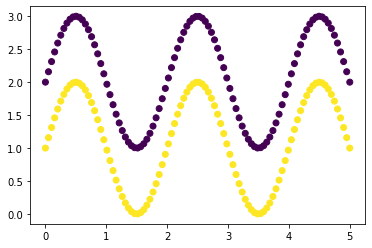

In [3]:
dataset = np.array(dataset)
X = dataset[:,:2]
y = dataset[:,-1]
y[y==0] = -1
print(X.shape)
print(y.shape)
plt.scatter(X[:,0], X[:,1], c=y, label="Features of our data")
plt.show()

In [ ]:
model = SVM()
model.fit(X, y)

In [ ]:
from sklearn.svm import SVC

clf = SVC(C = 10, kernel = 'linear')
clf.fit(X, y.ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

In [4]:
import cvxopt

#here I use z instead of xprime since I don't know how to write prime in code....

def plot_contour(X, y, svm):
    # plot the resulting classifier
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    points = np.c_[xx.ravel(), yy.ravel()]

    Z = svm.predict(points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)

    # plt the points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)


class SVM:
    def __init__(self, kernel='gaussian', C=1):
        self.kernel = kernel
        self.C = C
        self.w=None

    def fit(self, X, y, margin='hard'):
        self.y = y
        self.X = X
        self.margin = margin
        self.m, self.n = X.shape
          
        #Calculate Similarity functions using kernel method
        self.K = self.calc_similarity_functions(self.X, self.X)
          
        # Solve with cvxopt final QP needs to be reformulated
        # to match the input form for cvxopt.solvers.qp
        P = cvxopt.matrix(np.outer(y, y) * self.K)
        q = cvxopt.matrix(-np.ones((self.m, 1)))
        if self.margin=='hard':
            G = cvxopt.matrix(np.eye(self.m) * -1)
            h = cvxopt.matrix(np.zeros(self.m))
        elif self.margin=='soft':
            G = cvxopt.matrix(np.vstack((np.eye(self.m) * -1, np.eye(self.m))))
            h = cvxopt.matrix(np.hstack((np.zeros(self.m), np.ones(self.m) * self.C)))
        else:
            raise ValueError("Invalid margin value given.")
            
        A = cvxopt.matrix(y, (1, self.m), "d")
        b = cvxopt.matrix(np.zeros(1))
        cvxopt.solvers.options["show_progress"] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        self.alphas = np.array(sol["x"])

    def calc_similarity_functions(self, X, lm):
        # Calculate Kernel
        m=X.shape[0]
        kernel = np.zeros((m, m), dtype='float')
        for i in range(m):
            for j in range(m):
                if self.kernel=='gaussian':
                    kernel[i,j] = self.gaussian_kernel(X[i], lm[j])
                elif self.kernel=='polynomial':
                    kernel[i,j] = self.polynomial_kernel(X[i], lm[j])
                elif self.kernel=='linear':
                    kernel[i,j] = self.linear_kernel(X[i], lm[j])
                else:
                    raise ValueError("Invalid entry for kernel")
        return kernel
          
    def gaussian_kernel(self, xi, xj, sigma=0.1):
        return np.exp(-np.linalg.norm(xi - xj) ** 2 / (2 * (sigma ** 2)))

    def linear_kernel(self, xi, xj):
        return np.dot(xi, xj.T)

    def polynomial_kernel(self, xi, xj, p=5):
        return (1 + np.dot(xi, xj.T)) ** p
    
    def predict(self, X):  
        y_predict = np.zeros((X.shape[0]))
        sv = self.get_parameters(self.alphas)
        lm=self.X[sv]
        kernel = np.zeros((X.shape[0], lm.shape[0]), dtype='float')
        for i in range(X.shape[0]):
            for j in range(lm.shape[0]):
                if self.kernel=='gaussian':
                    kernel[i,j] = self.gaussian_kernel(X[i], lm[j])
                elif self.kernel=='polynomial':
                    kernel[i,j] = self.polynomial_kernel(X[i], lm[j])
                elif self.kernel=='linear':
                    kernel[i,j] = self.linear_kernel(X[i], lm[j])

        for i in range(X.shape[0]):
            y_predict[i] = np.sum(
                self.alphas[sv]
                * self.y[sv, np.newaxis]
                * kernel[i][:, np.newaxis]
            )

        return np.sign(y_predict + self.b)

    def get_parameters(self, alphas):
        threshold = 1e-5
        
        if self.margin=='soft':
            sv = ((alphas > threshold) * (alphas < self.C)).flatten()
        elif self.margin=='hard':
            sv = (alphas > threshold).flatten()
        self.w = np.dot(self.X[sv].T, alphas[sv] * self.y[sv, np.newaxis])
        self.b = np.mean(
            self.y[sv, np.newaxis]
            - self.alphas[sv] * self.y[sv, np.newaxis] * self.K[sv, sv][:, np.newaxis]
        )
        return sv
    


In [ ]:
dataset = np.array(dataset)
X = dataset[:,:2]
y = dataset[:,-1]
y[y==0] = -1
print(X.shape)
print(y.shape)
plt.scatter(X[:,0], X[:,1], c=y, label="Features of our data")
plt.show()

In [5]:
svm = SVM(kernel='gaussian')
svm.fit(X, y)
y_pred = svm.predict(X)
plot_contour(X, y, svm)

print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")

KeyboardInterrupt: 

In [ ]:
svm = SVM(kernel=gaussian)
svm.fit(X, y, margin='soft')
y_pred = svm.predict(X)
plot_contour(X, y, svm)

print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")

In [ ]:
svm = SVM(kernel=gaussian)
svm.fit(X, y, margin='fdg')
y_pred = svm.predict(X)
plot_contour(X, y, svm)

print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")

In [ ]:
'''
    def predict(self, X_test):  #<----this is X_test
        if self.w is not None:
            return np.dot(X_test, self.w) + self.b
        else:
            y_predict = np.zeros((X_test.shape[0]))
            sv = self.get_parameters(self.alphas)

            for i in range(X_test.shape[0]):

                if self.kernel=='gaussian':
                    k = self.gaussian_kernel(X_test[i], self.X[sv])
                elif self.kernel=='polynomial':
                    k = self.polynomial_kernel(X_test[i], self.X[sv])
                elif self.kernel=='linear':
                    k = self.linear_kernel(X_test[i], self.X[sv])
                else:
                    raise ValueError("Invalid entry for kernel")

                y_predict[i] = np.sum(self.alphas[sv] * self.y[sv, np.newaxis] * k)

            return np.sign(y_predict + self.b)
'''